# EDA & Preprocessing

##### Aziz Maredia | DSIR-1019 | 01.27.21

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_extraction.text import CountVectorizer

pd.options.mode.chained_assignment = None

pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 

In [2]:
tracks = pd.read_csv('.././datasets/combined_tracks.csv')

In [3]:
tracks.shape

(1542, 50)

In [4]:
tracks = tracks.loc[tracks['data_type'] == 'user_library', :]

In [5]:
tracks_corr = tracks[['danceability', 'energy', 'loudness', 'speechiness', 
               'acousticness', 'instrumentalness', 'liveness', 
               'valence', 'tempo', 'mode']].corr()

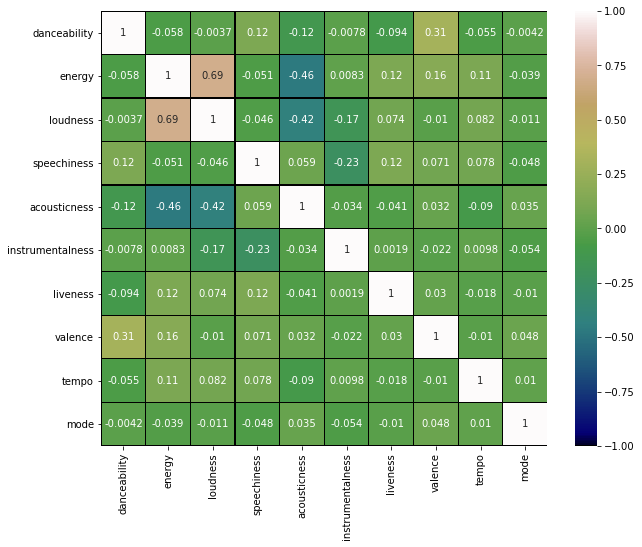

In [6]:
plt.figure(figsize = (10,8))

sns.heatmap(tracks_corr, vmin = -1, vmax = 1, cmap = "gist_earth", annot = True, linewidths = 0.05, linecolor = 'black');

### Most Common Artists

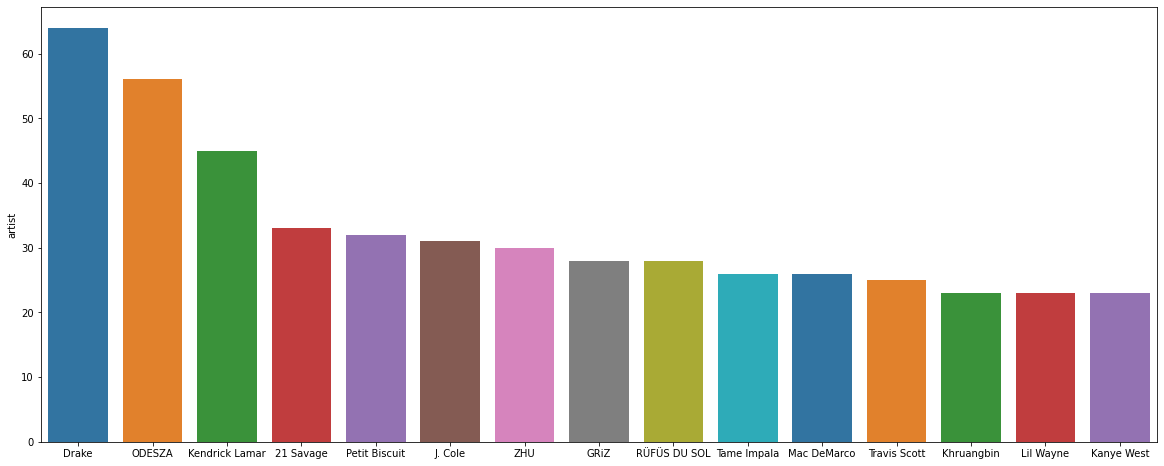

In [7]:
plt.figure(figsize = (20,8))

sns.barplot(x = tracks['artist'].value_counts()[:15].index,
            y = tracks['artist'].value_counts()[:15],
            palette = 'tab10');

### Artist and Song Popularity

In [8]:
tracks[['popularity_artist', 'popularity_song']].mean()

popularity_artist    73.477034
popularity_song      41.195538
dtype: float64

In [9]:
tracks[['popularity_artist', 'popularity_song']].median()

popularity_artist    73.0
popularity_song      48.0
dtype: float64

In [10]:
tracks[['artist', 'popularity_artist']].groupby('artist').mean().sort_values(by = 'popularity_artist', ascending = False)[:25]

popularity_artist
artist                           
Drake                          97
Justin Bieber                  96
The Weeknd                     95
Eminem                         94
Travis Scott                   94
DaBaby                         94
Dua Lipa                       94
Post Malone                    93
Lil Baby                       93
Lil Uzi Vert                   92
Kanye West                     91
Future                         91
Young Thug                     91
Khalid                         91
Gunna                          90
Kid Cudi                       90
Sia                            90
Lil Wayne                      90
Nicki Minaj                    90
Ty Dolla $ign                  89
Roddy Ricch                    89
Kendrick Lamar                 89
Coldplay                       89
Halsey                         89
Cardi B                        89

In [11]:
tracks[['track', 'artist', 'popularity_song']].sort_values(by = 'popularity_song', ascending = False)[:25]

track  \
120                                             The Box   
141                                 HIGHEST IN THE ROOM   
694                                          goosebumps   
31                                              ROXANNE   
525                                          SICKO MODE   
1270                                          All of Me   
61    WHATS POPPIN (feat. DaBaby, Tory Lanez & Lil W...   
34                                               Runnin   
98                           Life Is Good (feat. Drake)   
416                                              Yellow   
131       Sunflower - Spider-Man: Into the Spider-Verse   
623                          The Less I Know The Better   
1354                                    Pumped Up Kicks   
1076                                             Closer   
1029                                            Starboy   
780                                       XO Tour Llif3   
1499                                     No Role Modelz   
62                                         WHATS POPPIN   
237             Just the Two of Us (feat. Bill Withers)   
36                          Mr. Right Now (feat. Drake)   
736                                              Africa   
314                    Drip Too Hard (Lil Baby & Gunna)   
136                                          Without Me   
413                                             Fix You   
951                                     Congratulations   

                      artist  popularity_song  
120              Roddy Ricch             89.0  
141             Travis Scott             88.0  
694             Travis Scott             88.0  
31            Arizona Zervas             87.0  
525             Travis Scott             87.0  
1270             John Legend             86.0  
61               Jack Harlow             86.0  
34                 21 Savage             85.0  
98                    Future             85.0  
416                 Coldplay             85.0  
131              Post Malone             85.0  
623              Tame Impala             85.0  
1354       Foster The People             84.0  
1076        The Chainsmokers             84.0  
1029              The Weeknd             84.0  
780             Lil Uzi Vert             84.0  
1499                 J. Cole             84.0  
62               Jack Harlow             84.0  
237   Grover Washington, Jr.             83.0  
36                 21 Savage             83.0  
736                     TOTO             83.0  
314                 Lil Baby             82.0  
136                   Halsey             82.0  
413                 Coldplay             82.0  
951              Post Malone             82.0

### Release Date

In [12]:
tracks['release_date'] = [int(i[:4]) for i in tracks['release_date']]

new_dates = []
    
for date in tracks['release_date']:
    if date < 1950:
        new_dates.append('Pre_50s')
    elif date >= 1950 and date < 1960:
        new_dates.append('50s')
    elif date >= 1960 and date < 1970:
        new_dates.append('60s')
    elif date >= 1970 and date < 1980:
        new_dates.append('70s')
    elif date >= 1980 and date < 1990:
        new_dates.append('80s')
    elif date >= 1990 and date < 2000:
        new_dates.append('90s')
    elif date >= 2000 and date < 2010:
        new_dates.append('2000s')
    elif date >= 2010:
        new_dates.append('Post_2010s')
    else:
        new_dates.append('Date not available')
        
tracks['release_date'] = new_dates

In [13]:
pd.DataFrame(tracks['release_date'].value_counts())

release_date
Post_2010s          1394
2000s                 86
70s                   14
90s                   13
80s                   12
60s                    5

### Audio Analysis

In [14]:
tracks['loudness'] = (tracks['loudness'] / 60) * -1

tracks_audio = pd.melt(tracks, value_vars=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence'])

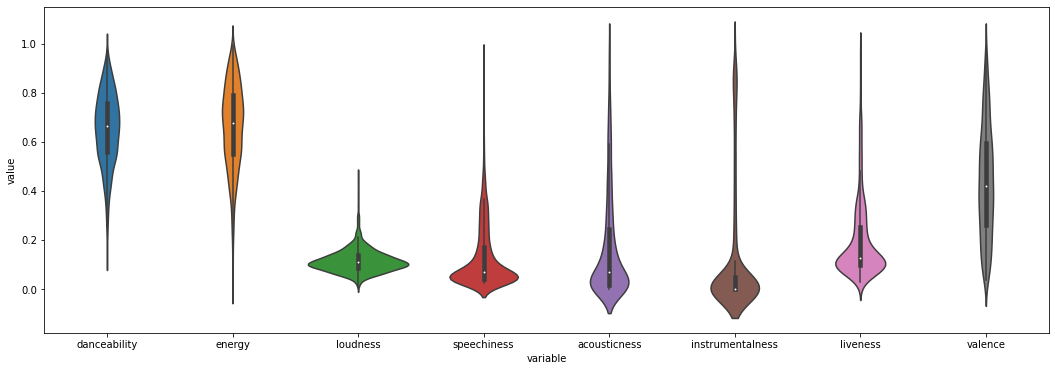

In [15]:
plt.figure(figsize=(18,6))

sns.violinplot(x = tracks_audio['variable'], y = tracks_audio['value']);

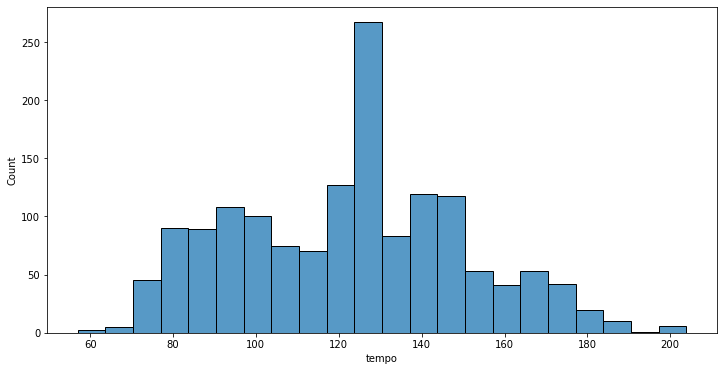

In [16]:
plt.figure(figsize=(12,6))

sns.histplot(tracks['tempo']);

In [17]:
key_map = {0:'C', 1:'C♯', 2:'D', 3:'D♯', 4:'E', 5:'F', 6:'F♯', 7:'G', 8:'G♯', 9:'A', 10:'A♯', 11:'B'}
tracks['key'] = tracks['key'].map(key_map)

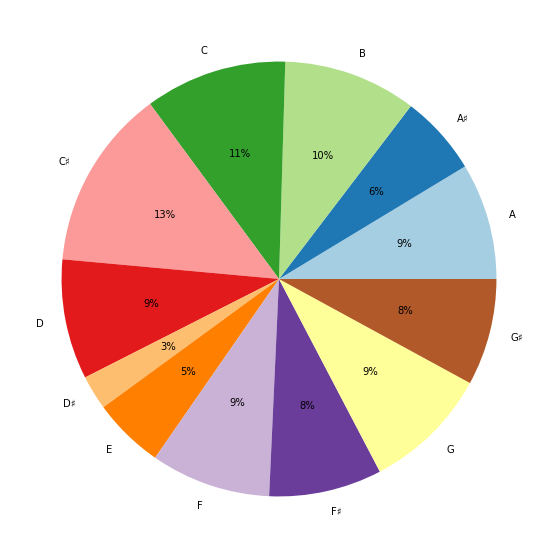

In [18]:
plt.figure(figsize = (10,10))

cmap = plt.get_cmap("Paired")

plt.pie(x = tracks['key'].value_counts().sort_index(),
        labels = tracks['key'].value_counts().sort_index().index, 
        colors = cmap(np.arange(12)), 
        normalize = True,
        autopct = '%.0f%%');

In [19]:
pd.DataFrame(tracks['time_signature'].value_counts())

time_signature
4            1450
3              42
5              27
1               5

In [20]:
pd.DataFrame(tracks['mode'].value_counts())

mode
1   886
0   638

In [21]:
top_genres = tracks[['alternative', 'bluegrass', 'blues',
       'celtic', 'country', 'dance', 'disco', 'edm', 'electro', 'folk',
       'germanic', 'hip hop', 'house', 'jazz', 'other', 'piano', 'pop', 'punk',
       'r&b', 'rap', 'reggae', 'rock', 'soul', 'swing', 'techno', 'trance']].sum().sort_values(ascending = False)[:10]

In [22]:
df = None
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for i in enumerate(top_genres.index):
    if i[0] == 0:
        df = pd.DataFrame(tracks.loc[tracks[i[1]]==1,:][audio_features].mean(), columns = [i[1]]).T
    else:
        temp_df = pd.DataFrame(tracks.loc[tracks[i[1]]==1,:][audio_features].mean(), columns = [i[1]]).T
        df = pd.concat([df, temp_df], axis = 0)

In [23]:
top_genres

pop        785
rap        612
hip hop    469
edm        430
electro    430
house      378
dance      275
rock       144
soul       115
other      102
dtype: int64

In [24]:
df

danceability    energy  loudness  speechiness  acousticness  \
pop          0.652009  0.681781  0.107170     0.114946      0.150136   
rap          0.700694  0.654580  0.107361     0.199840      0.158571   
hip hop      0.705930  0.635284  0.114495     0.223459      0.176347   
edm          0.637902  0.733101  0.102921     0.084881      0.113318   
electro      0.641019  0.746014  0.096420     0.085189      0.090270   
house        0.651272  0.730847  0.100820     0.078406      0.115767   
dance        0.638953  0.742258  0.092931     0.080614      0.106457   
rock         0.571910  0.659819  0.124502     0.052308      0.223339   
soul         0.595443  0.617296  0.124052     0.104653      0.249948   
other        0.580863  0.658583  0.124885     0.091406      0.163466   

         instrumentalness  liveness   valence       tempo  
pop              0.096707  0.188622  0.429920  124.938596  
rap              0.032777  0.207749  0.431677  124.739938  
hip hop          0.011077  0.210681  0.450674  123.610429  
edm              0.174956  0.197760  0.397959  124.596181  
electro          0.184883  0.198388  0.396570  125.581835  
house            0.220761  0.184781  0.371774  124.167897  
dance            0.163695  0.195741  0.408496  122.895676  
rock             0.058550  0.177858  0.523640  121.894160  
soul             0.137331  0.203603  0.463533  116.977357  
other            0.222978  0.218467  0.353652  118.359549